# IBTrACS

In [1]:
import xarray as xr
from sithom.plot import plot_defaults
from sithom.xr import plot_units
from src.constants import IBTRACS_NC
plot_defaults()

In [2]:
ds = xr.open_dataset(IBTRACS_NC)

In [21]:
ds.storm.shape[0]

13612

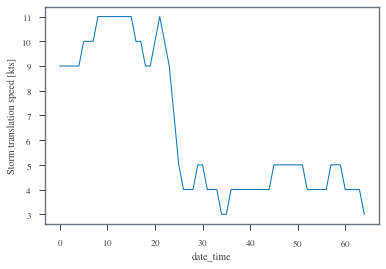

In [4]:
ds.storm_speed.isel(storm=0).plot()

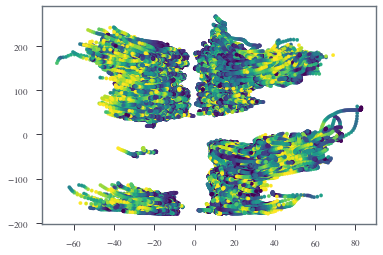

In [22]:
import numpy as np
import matplotlib.pyplot as plt


def plot_storm(ds: xr.Dataset, var: str ="storm_speed", storm_num: int = 0, cmap="viridis") -> None:
    plt.scatter(
        ds.storm_speed.isel(storm=storm_num)["lat"].values,
        ds.storm_speed.isel(storm=storm_num)["lon"].values,
        c=ds.storm_speed.isel(storm=storm_num).values,
        marker=".",
        cmap=viridis,
    )

def plot_all_storms(ds: xr.Dataset, var="storm_speed", cmap="viridis") -> None:
    for num in range(0, ds.storm.shape[0]):
        plot_storm(ds, var=var, storm_num=num, cmap=cmap)


plot_all_storms()

In [76]:
import numpy as np


def union(lst1, lst2):
    return list(set(lst1) | set(lst2))

def intersection(lst1, lst2):
    return list(set(lst1).intersection(set(lst2)))

def filter_function(xr_obj, filter = [("basin", [b"NA"]), ("nature", [b"SS", b"TS"])]):
    storm_list = None
    for filter_part in filter:
        print(filter_part)
        storm_list_part = None
        for value in filter_part[1]:
            truth_array = xr_obj[filter_part[0]] == value
            print(truth_array.values.shape)
            compressed_array = np.any(truth_array, axis=1)
            print(compressed_array.shape)
            storm_list_temp = xr_obj.storm.values[compressed_array]
            if storm_list_part is None:
                storm_list_part = storm_list_temp
            else:
                storm_list_part = union(storm_list_temp, storm_list_part)
            print(len(storm_list_part))
        if storm_list is None:
            storm_list = storm_list_part
        else:
            storm_list = intersection(storm_list_part, storm_list)
    print(len(storm_list))
    return xr_obj.sel(storm=storm_list)

In [65]:
na = np.array([2, 1, 0])
ta = np.array([False, True, False])
na[ta]

array([1])

In [77]:
new_ds = filter_function(ds)
new_ds

('basin', [b'NA'])
(13612, 360)
(13612,)
2306
('nature', [b'SS', b'TS'])
(13612, 360)
(13612,)
196
(13612, 360)
(13612,)
10470
2300


<xarray.Dataset>
Dimensions:           (storm: 2300, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 11.0 37.0 41.0 1.0 ... 39.0 17.0 111.0
    sid               (storm) |S13 b'1973322N10280' ... b'1973289N16278'
    season            (storm) float32 1.973e+03 1.851e+03 ... 1.973e+03
    number            (storm) int16 126 5 6 7 8 9 10 ... 94 98 104 112 114 115
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 ...
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [50]:
ds["basin"].isel(storm=slice(10,20)) == b"NA"

<xarray.DataArray 'basin' (storm: 10, date_time: 360)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])
Coordinates:
    time     (storm, date_time) datetime64[ns] ...
    lat      (storm, date_time) float32 ...
    lon      (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time

In [13]:
ds["basin"]

<xarray.DataArray 'basin' (storm: 13612, date_time: 360)>
[4900320 values with dtype=|S2]
Coordinates:
    time     (storm, date_time) datetime64[ns] ...
    lat      (storm, date_time) float32 ...
    lon      (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time
Attributes:
    long_name:              Current basin
    Note:                   EP=East_Pacific NA=North_Atlantic NI=North_Indian...
    coverage_content_type:  thematicClassification

In [6]:
for i in ds.storm:
    print(ds.sel(storm=i).name.values)

b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'
b'NOT_NAMED'

KeyboardInterrupt: 

In [11]:
ds.basin.plot()

<xarray.DataArray 'basin' (storm: 13612, date_time: 360)>
[4900320 values with dtype=|S2]
Coordinates:
    time     (storm, date_time) datetime64[ns] ...
    lat      (storm, date_time) float32 ...
    lon      (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time
Attributes:
    long_name:              Current basin
    Note:                   EP=East_Pacific NA=North_Atlantic NI=North_Indian...
    coverage_content_type:  thematicClassification

In [30]:
plot_units(ds)

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 81, time: 288)
Coordinates:
  * longitude  (longitude) float32 -100.0 -99.75 -99.5 ... -80.5 -80.25 -80.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 15.5 15.25 15.0
  * time       (time) datetime64[ns] 2005-08-20 ... 2005-08-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    mwd        (time, latitude, longitude) float32 ...
    mwp        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    swh        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-05-24 18:12:03 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

: 

ds.swh.sel(time="2005-08-2T01:00:00").plot()
ds.tp.sel(time="2005-08-2T01:00:00").plot()